<a href="https://colab.research.google.com/github/gokul-prathap-git/DSAIRPFeb25/blob/session1/KMeans_%26_Agglomorative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


In [7]:
data['Genre'] = data['Genre'].map({'Male':0,'Female':1})

In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [9]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
x = data[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
for i in range(2,11):
  km = KMeans(n_clusters=i,n_init= 10)
  km.fit(x)
  css = km.inertia_#wcss score
  wcss.append(css)

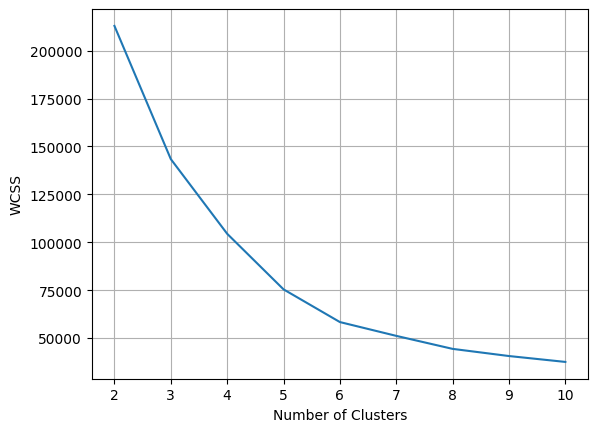

In [13]:
plt.plot(range(2,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()

In [14]:
km = KMeans(n_clusters=5,n_init=10)
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [15]:
cluster_labels = km.predict(x)

In [16]:
cluster_labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

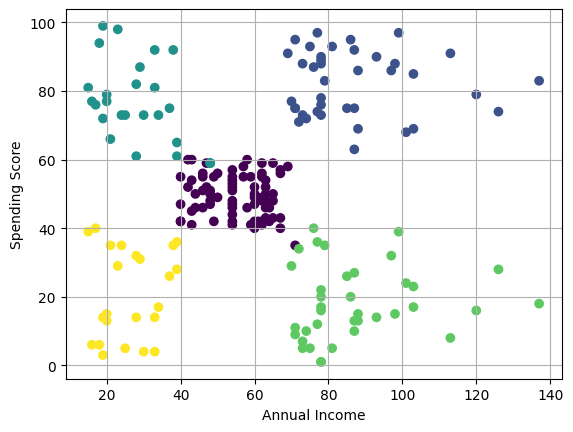

In [17]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=cluster_labels)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()

In [18]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters = 5,
                             metric = 'euclidean',
                             linkage = 'ward')

y_hc = agg_hc.fit_predict(x)

In [21]:
from sklearn.metrics import silhouette_score
silhouette_score_agg = silhouette_score(x,y_hc)

In [22]:
silhouette_score_agg

np.float64(0.43997527212476695)

In [23]:
kmeans_silhouette_score = silhouette_score(x,cluster_labels)

In [24]:
kmeans_silhouette_score

np.float64(0.43959178858284587)

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(x)
labels = db.labels_